In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sb_utils import save_file
from sklearn import linear_model
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
#Models 

from numpy import array
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score


from sklearn.ensemble               import RandomForestClassifier
from sklearn.linear_model        import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('../data/coviddata.csv')

In [3]:
data.head()

,Origin,Entity,Sex,Residence Entity,Residence Municipality,Patient Type,Date Entry,Date Symptoms,Date Died,Intubated,...,Cardiovascular,Obesity,Chronic Kidney,Tobacco,COVID Contact,Sample Result,Antigen Result,COVID,ICU,Death
0,1,20,2,20,67,1,2022-06-23,2022-06-21,9999-99-99,97,...,2,2,2,2,1,97,2,2,97,0
1,2,14,1,14,71,1,2022-08-09,2022-08-06,9999-99-99,97,...,2,2,2,2,2,97,1,1,97,0
2,2,25,2,25,1,1,2022-02-14,2022-02-14,9999-99-99,97,...,2,2,2,2,2,97,2,2,97,0
3,2,9,2,9,12,2,2022-01-19,2022-01-17,9999-99-99,2,...,2,2,2,2,2,97,2,2,2,0
4,2,9,2,9,10,1,2022-05-03,2022-05-03,9999-99-99,97,...,2,2,2,1,2,97,2,2,97,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330961 entries, 0 to 6330960
Data columns (total 30 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Origin                  int64 
 1   Entity                  int64 
 2   Sex                     int64 
 3   Residence Entity        int64 
 4   Residence Municipality  int64 
 5   Patient Type            int64 
 6   Date Entry              object
 7   Date Symptoms           object
 8   Date Died               object
 9   Intubated               int64 
 10  Pneumonia               int64 
 11  Age                     int64 
 12  Nationality             int64 
 13  Pregnant                int64 
 14  Diabetes                int64 
 15  COPD                    int64 
 16  Asthma                  int64 
 17  Immunosuppresed         int64 
 18  Hypertension            int64 
 19  Other Disease           int64 
 20  Cardiovascular          int64 
 21  Obesity                 int64 
 22  Chronic Kidney    

In [5]:
ready = data.drop(columns=['Sex','Date Died','Date Entry','Date Symptoms','Residence Entity','Residence Municipality'], axis=1)

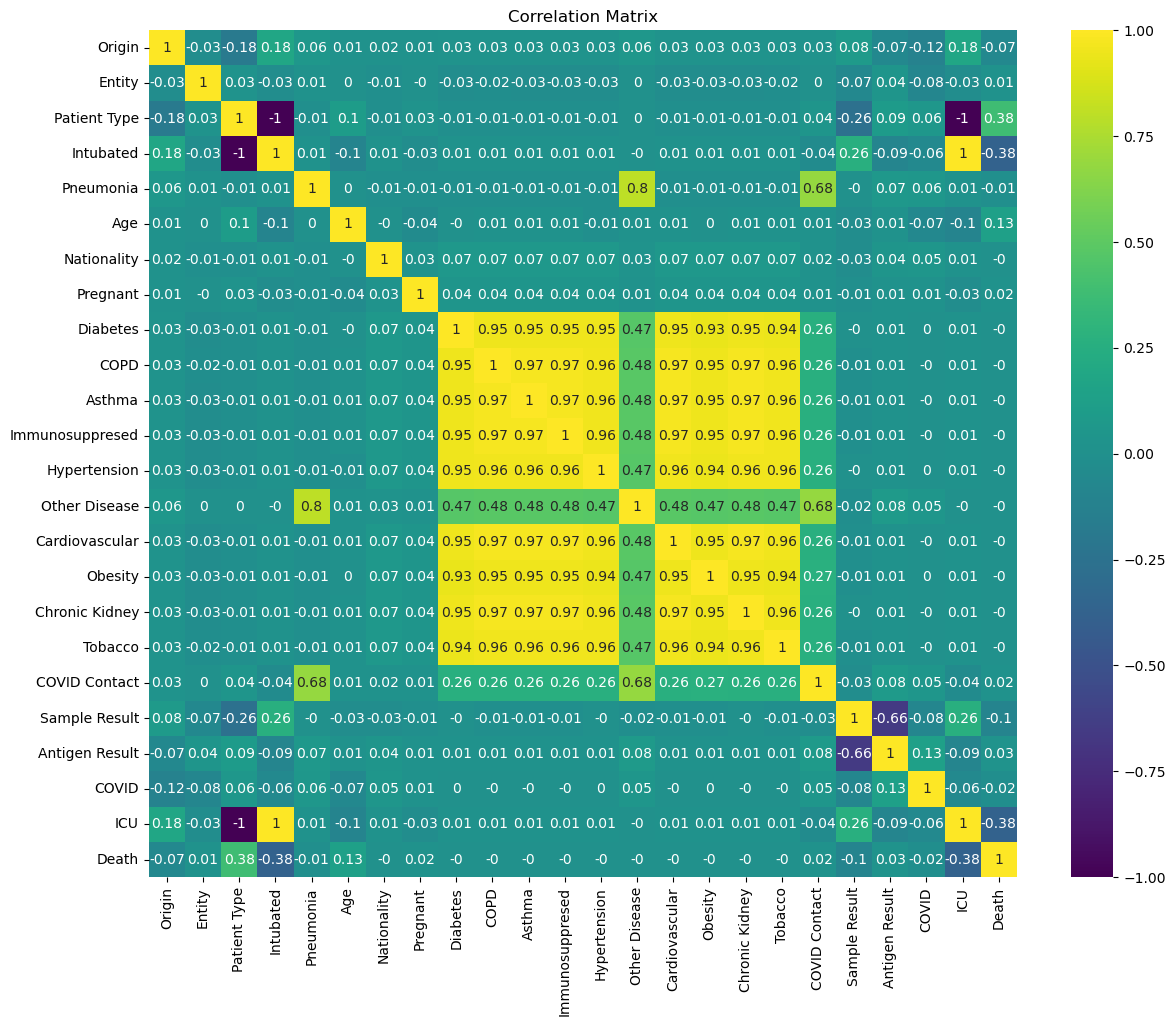

In [6]:
corr_matrix = np.round(np.corrcoef(ready, rowvar=False), 2)

# Plotting the correlation matrix
plt.figure(figsize=(14,11))
sns.heatmap(corr_matrix, cmap='viridis', annot=True,
            xticklabels=ready.columns, yticklabels=ready.columns
           )
plt.title("Correlation Matrix");

In [7]:
y = ready['COVID']
X = ready.drop(columns=['COVID'],axis=1)

print("Feature data dimension: ", X.shape)

Feature data dimension:  (6330961, 23)


In [8]:
select=SelectKBest(chi2,k=12)
new=select.fit_transform(X,y)

In [9]:
select.get_support()

array([ True,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True])

In [10]:
select.get_feature_names_out(input_features=None)

array(['Origin', 'Entity', 'Intubated', 'Pneumonia', 'Age', 'Pregnant',
       'Other Disease', 'COVID Contact', 'Sample Result',
       'Antigen Result', 'ICU', 'Death'], dtype=object)

In [11]:
f = select.get_support(1)
top=ready[ready.columns[f]]
top

,Origin,Entity,Intubated,Pneumonia,Age,Pregnant,Other Disease,COVID Contact,Sample Result,Antigen Result,COVID,ICU
0,1,20,97,2,28,97,2,1,97,2,2,97
1,2,14,97,2,57,2,2,2,97,1,1,97
2,2,25,97,2,81,97,2,2,97,2,2,97
3,2,9,2,2,33,97,2,2,97,2,2,2
4,2,9,97,2,43,97,2,2,97,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...
6330956,2,15,97,99,54,97,98,99,3,97,2,97
6330957,2,15,97,99,39,97,98,99,1,97,1,97
6330958,2,15,97,99,21,97,98,99,3,97,2,97
6330959,2,15,97,99,37,2,98,99,97,97,2,97


## Random Forest Classifier

In [12]:
y = top['COVID']
X = top.drop(columns=['COVID'],axis=1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [14]:
rfr = RandomForestClassifier()
model = rfr.fit(X_train, y_train)
rfr_pred = model.predict(X_test)

In [15]:
rfc_score = accuracy_score(y_test, rfr_pred)

print(classification_report(y_test, rfr_pred))

print("The accuracy of the Random Forest Classifier is %", rfc_score)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99    784561
           2       0.98      1.00      0.99    798180

    accuracy                           0.99   1582741
   macro avg       0.99      0.99      0.99   1582741
weighted avg       0.99      0.99      0.99   1582741

The accuracy of the Random Forest Classifier is % 0.9888225553012148


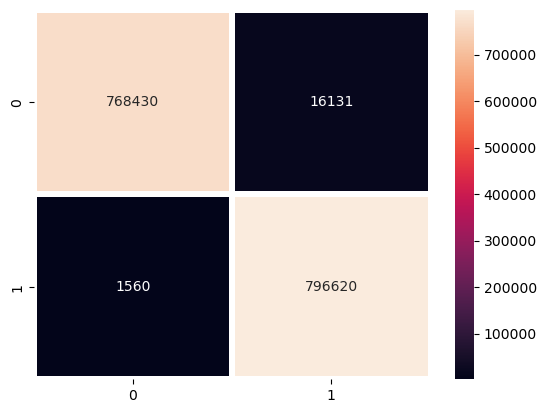

In [16]:
sns.heatmap(confusion_matrix(y_test, rfr.predict(X_test)), annot=True, fmt=".0f",linewidths=4);

## Logistic Regression

In [17]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train, y_train)
log_pred = model.predict(X_test)

C:\Users\aykal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
logistic_score = accuracy_score(y_test, log_pred)

print(classification_report(y_test, log_pred))

print("The accuracy of the Logistic Regression is %", logistic_score)

              precision    recall  f1-score   support

           1       0.57      0.66      0.61    784561
           2       0.61      0.51      0.56    798180

    accuracy                           0.59   1582741
   macro avg       0.59      0.59      0.58   1582741
weighted avg       0.59      0.59      0.58   1582741

The accuracy of the Logistic Regression is % 0.5863960054108663


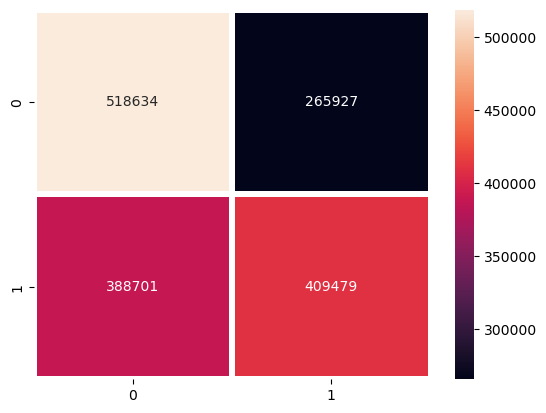

In [19]:
sns.heatmap(confusion_matrix(y_test, logmodel.predict(X_test)), annot=True, fmt=".0f",linewidths=4);

## Gradient Boosting Classifier

In [20]:
y = top['COVID']
X = top.drop(columns=['COVID'],axis=1)

In [21]:
gbc = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold (n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbc, X_test, y_test, scoring='accuracy', cv=cv)


In [22]:
#(n_estimators=100, learning_rate=1.0, max_depth=1).fit(x_train, y_train)
#vl = cross_val_score(gbc, x_test,y_test, cv=10, n_jobs=-1)
print(round((n_scores.mean()*100),2))

98.83


In [23]:
gbc.fit(X, y)

gbc_pred = gbc.predict(X_test)

In [24]:
gbc_score = accuracy_score(y_test, gbc_pred)

print(classification_report(y_test,gbc_pred))

print("The accuracy of the XGBoost Classifier is %", gbc_score)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99    784561
           2       0.98      1.00      0.99    798180

    accuracy                           0.99   1582741
   macro avg       0.99      0.99      0.99   1582741
weighted avg       0.99      0.99      0.99   1582741

The accuracy of the XGBoost Classifier is % 0.9882665578259487


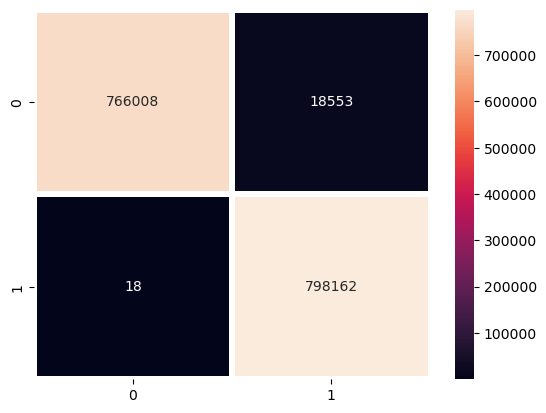

In [25]:
sns.heatmap(confusion_matrix(y_test, gbc.predict(X_test)), annot=True, fmt=".0f",linewidths=4);